1. Importing Required Libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import tensorflow as tf
from tensorflow import keras

In [82]:
import rasterio
from rasterio.plot import show

2. Setting Up GPU/CPU Device for Computation

In [83]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


3. Reading Sentinel-2 Image

In [84]:
img=rasterio.open("D:\\New folder (5)\\Sentinal.tif")

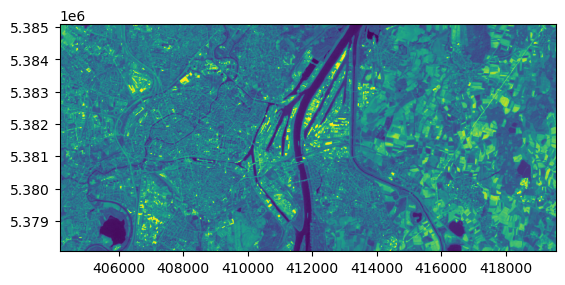

<Axes: >

In [85]:
show(img)

4. Extracting Image Metadata

In [86]:
full_img=img.read()
print(full_img.shape)

(3, 342, 748)


In [87]:
num_bands=full_img.shape[0]
print(num_bands)

3


5. Extracting Individual Bands

In [88]:
img_band1=img.read(1)
img_band2=img.read(2)   
img_band3=img.read(3)

In [89]:
img_band1, img_band2, img_band3

(array([[142, 148, 151, ..., 190, 167, 193],
        [141, 146, 149, ..., 183, 168, 166],
        [139, 147, 161, ..., 176, 178, 172],
        ...,
        [ 99, 119,  95, ..., 141, 134, 134],
        [113, 114, 140, ..., 140, 132, 122],
        [113, 116, 133, ..., 134, 126, 117]], dtype=uint8),
 array([[129, 135, 136, ..., 151, 142, 164],
        [125, 131, 132, ..., 148, 137, 140],
        [126, 127, 132, ..., 145, 146, 139],
        ...,
        [ 88, 110,  73, ..., 123, 115, 122],
        [ 98,  91, 122, ..., 121, 116, 113],
        [ 96,  97, 116, ..., 118, 116, 107]], dtype=uint8),
 array([[101, 102, 105, ..., 133, 118, 140],
        [ 97, 100, 100, ..., 128, 116, 117],
        [ 93, 100, 111, ..., 125, 125, 120],
        ...,
        [ 85, 107,  75, ...,  99,  95,  95],
        [ 97,  87, 115, ..., 100,  93,  87],
        [ 93,  97, 115, ...,  96,  92,  83]], dtype=uint8))

6. Visualizing a Band

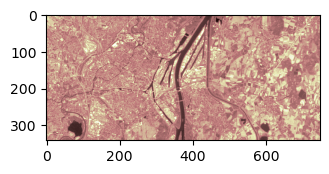

In [90]:
fig=plt.figure(figsize=(12, 12))
ax1=fig.add_subplot(2, 3, 1)
ax1.imshow(img_band1, cmap='pink')

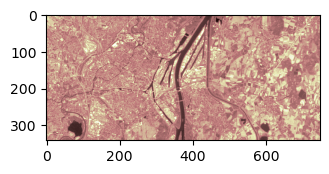

In [91]:
fig=plt.figure(figsize=(12, 12))
ax2=fig.add_subplot(2, 3, 2)
ax2.imshow(img_band1, cmap='pink')

7. Extracting Image Metadata Information

In [92]:
print("Cordinate reference system", img.crs)
print("Image width:", img.width)
print("Image height:", img.height)
print("Image bounds:", img.bounds)
print("Image Geotransform:", img.transform)
print("Image no of bands:", img.count)
print("Image driver:", img.driver)
print("Image dtype:", img.dtypes)


Cordinate reference system EPSG:32632
Image width: 748
Image height: 342
Image bounds: BoundingBox(left=404175.24563361524, bottom=5378058.08301395, right=419537.60384986334, top=5385082.048936352)
Image Geotransform: | 20.54, 0.00, 404175.25|
| 0.00,-20.54, 5385082.05|
| 0.00, 0.00, 1.00|
Image no of bands: 3
Image driver: GTiff
Image dtype: ('uint8', 'uint8', 'uint8')


In [93]:
print("Image nodata:", img.nodatavals)
print("Image indexes:", img.indexes)
print("Image res:", img.res)
print("Image shape:", img.shape)
print("Image meta:", img.meta)
print("Image mode:", img.mode)
print("Image closed:", img.closed)
print("Image colorinterp:", img.colorinterp)
print("Image compress:", img.compression)
print("Image blocksize:", img.block_shapes)
print("Image maskflags enums:", img.mask_flag_enums)

Image nodata: (None, None, None)
Image indexes: (1, 2, 3)
Image res: (20.537912053807624, 20.537912053807656)
Image shape: (342, 748)
Image meta: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 748, 'height': 342, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(20.537912053807624, 0.0, 404175.24563361524,
       0.0, -20.537912053807656, 5385082.048936352)}
Image mode: r
Image closed: False
Image color

In [94]:
desc=img.descriptions
print("Image descriptions:", desc)

Image descriptions: (None, None, None)


8. Histogram of Image Bands

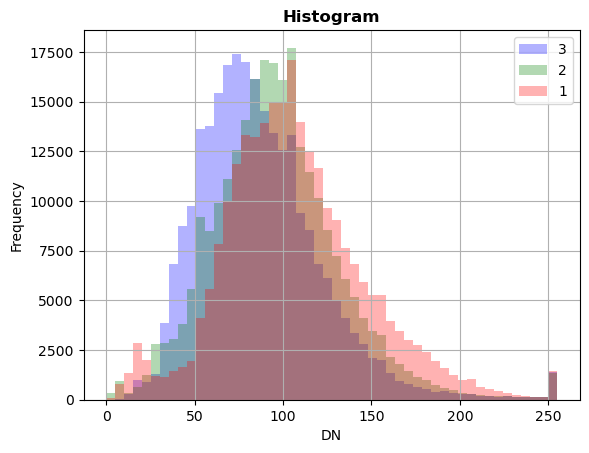

In [95]:
rasterio.plot.show_hist(full_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3, title="Histogram")

9. Clipping Image for Region of Interest (ROI)

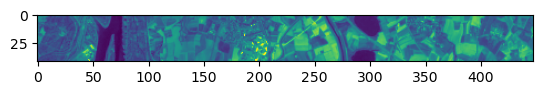

In [96]:
clipped_img=full_img[:, 300:900, 300:900]
plt.imshow(clipped_img[0,:,:])


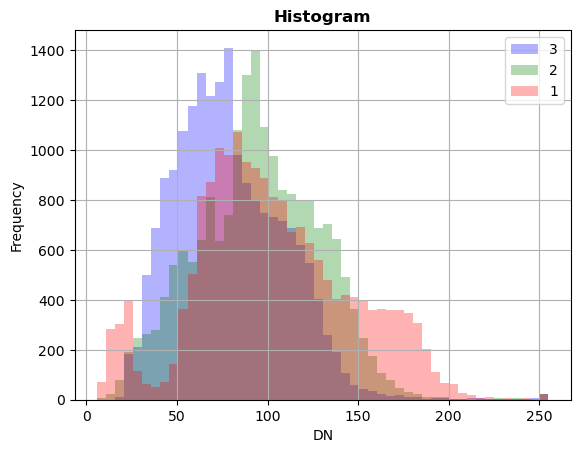

In [97]:
rasterio.plot.show_hist(clipped_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3, title="Histogram")

10. NDVI Computation

- NDVI Formula: NDVI = (NIR - Red) / (NIR + Red)

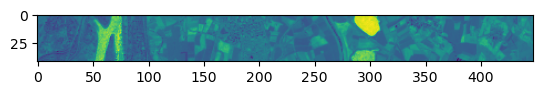

In [98]:
red_clipped=clipped_img[0].astype(np.float32)
nir_clipped=clipped_img[1].astype(np.float32)
ndvi_clipped=(nir_clipped-red_clipped)/(nir_clipped+red_clipped)
plt.imshow(ndvi_clipped)

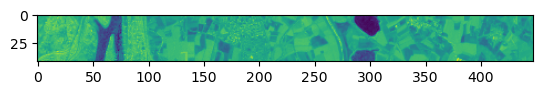

In [99]:
red_clipped=clipped_img[1].astype(np.float32)
nir_clipped=clipped_img[0].astype(np.float32)
ndvi_clipped=(nir_clipped-red_clipped)/(nir_clipped+red_clipped)
plt.imshow(ndvi_clipped)

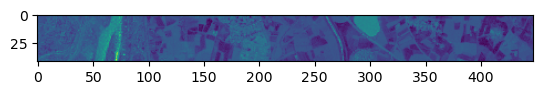

In [100]:
red_clipped=clipped_img[1].astype(np.float32)
nir_clipped=clipped_img[2].astype(np.float32)
ndvi_clipped=(nir_clipped-red_clipped)/(nir_clipped+red_clipped)
plt.imshow(ndvi_clipped)

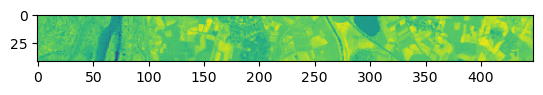

In [101]:
red_clipped=clipped_img[2].astype(np.float32)
nir_clipped=clipped_img[1].astype(np.float32)
ndvi_clipped=(nir_clipped-red_clipped)/(nir_clipped+red_clipped)
plt.imshow(ndvi_clipped)

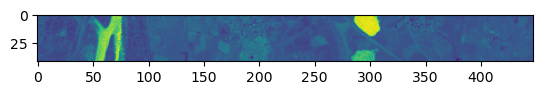

In [102]:
red_clipped=clipped_img[0].astype(np.float32)
nir_clipped=clipped_img[2].astype(np.float32)
ndvi_clipped=(nir_clipped-red_clipped)/(nir_clipped+red_clipped)
plt.imshow(ndvi_clipped)

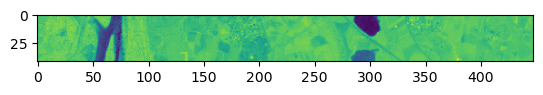

In [103]:
red_clipped=clipped_img[2].astype(np.float32)
nir_clipped=clipped_img[0].astype(np.float32)
ndvi_clipped=(nir_clipped-red_clipped)/(nir_clipped+red_clipped)
plt.imshow(ndvi_clipped)

Handling Division by Zero Using NumPy

In [104]:
import numpy as np
ndvi_clipped2=np.divide((nir_clipped-red_clipped), (nir_clipped+red_clipped), where=(nir_clipped+red_clipped)!=0)
ndvi_clipped3=np.nan_to_num(ndvi_clipped2, nan=-1)


In [105]:
ndvi_clipped2

array([[0.13043478, 0.14141414, 0.12643678, ..., 0.19736843, 0.18232045,
        0.18238993],
       [0.14414415, 0.14285715, 0.13333334, ..., 0.17482518, 0.18620689,
        0.1369863 ],
       [0.14155251, 0.14410481, 0.14035088, ..., 0.1884058 , 0.17073171,
        0.12264151],
       ...,
       [0.10552764, 0.13043478, 0.17525773, ..., 0.175     , 0.17030568,
        0.17030568],
       [0.1030303 , 0.19565217, 0.22352941, ..., 0.16666667, 0.17333333,
        0.16746412],
       [0.18367347, 0.1764706 , 0.14893617, ..., 0.16521738, 0.1559633 ,
        0.17      ]], dtype=float32)

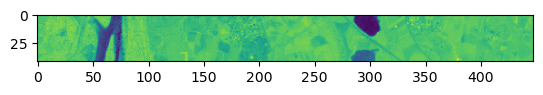

In [106]:
plt.imshow(ndvi_clipped2,cmap="viridis")

In [107]:
ndvi_clipped3

array([[0.13043478, 0.14141414, 0.12643678, ..., 0.19736843, 0.18232045,
        0.18238993],
       [0.14414415, 0.14285715, 0.13333334, ..., 0.17482518, 0.18620689,
        0.1369863 ],
       [0.14155251, 0.14410481, 0.14035088, ..., 0.1884058 , 0.17073171,
        0.12264151],
       ...,
       [0.10552764, 0.13043478, 0.17525773, ..., 0.175     , 0.17030568,
        0.17030568],
       [0.1030303 , 0.19565217, 0.22352941, ..., 0.16666667, 0.17333333,
        0.16746412],
       [0.18367347, 0.1764706 , 0.14893617, ..., 0.16521738, 0.1559633 ,
        0.17      ]], dtype=float32)

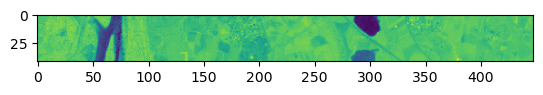

In [108]:
plt.imshow(ndvi_clipped3,cmap="viridis")

**Conclusion**

This script allows for reading, processing, and analyzing Sentinel-2 satellite imagery, particularly focusing on vegetation analysis through NDVI computation. It also visualizes the different bands and computes histograms for better insights into the image data.